In [1]:
from IPython.display import Image
import numpy as np
import pandas as pd
from scipy import stats as st

import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

# Задания для самостоятельного решения


### 1. Найдите минимально необходимый объем выборки для построения интервальной оценки среднего с точностью ∆ = 3, дисперсией σ^2 = 225 и уровнем доверия β = 0.95.

In [2]:
var = 225
sigma = math.sqrt(var)  # Стандартное отклонение
Z = 1.96  # 95%   # Квантиль нормального распределения. 
e = 3 #%         #Погрешность

N = ((sigma*Z)/e)**2
math.ceil(N)

97

### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

In [3]:
population_men  =st.norm.rvs(loc=19,scale=171,size=11000000)  # Выборка мужчин со средним ростом 171
population_women=st.norm.rvs(loc=16,scale=165,size=12000)  # Выборка женщин со средним ростом 165
alpha = 0.001

H0: различия между выборками незначительно  
H1: различия между выборками значительно

In [4]:
result = st.ttest_ind(population_men, population_women, equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, различия между выборками значительно')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=2.392857920638257, pvalue=0.016732958322096855)
Не отвергаем нулевую гипотезу


### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

In [5]:
sigma = 150  # Стандартное отклонение
Z = 1.96  # 95%   
e = 50 #%         #Погрешность

N = ((sigma*Z)/e)**2
math.ceil(N)

35

### 4.  Представьте, что вы хотите разоблачить "волшебника", который считает, что умеет предсказывать погоду на завтра. Отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого периода времени и получили такие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду, если уровнь значимости принять за 0.05 ?

In [6]:
observations = pd.DataFrame([[14,36],[15,45]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,14,36
Солнце,15,45


H0: предсказания волшебника случайны

H1: предсказания волшебника НЕ случайны

In [7]:
alpha = 0.05
#Точный критерий Фишера
oddsratio, pvalue = st.fisher_exact([[14, 36], [15, 45]])
print(oddsratio, pvalue)
if (pvalue < alpha):
    print('Отвергаем нулевую гипотезу, предсказания волшебника НЕ случайны')
else:
    print('Не отвергаем нулевую гипотезу')

1.1666666666666667 0.828664440194697
Не отвергаем нулевую гипотезу


### 5. Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия 90% для выборки: 
data = [1,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5]


In [8]:
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), st.sem(data)
    h = se * st.t.ppf((1 + confidence)/2, n)
    return m - h, m, m + h

In [9]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

print(mean_confidence_interval(data, 0.90))

(6.074074746111319, 6.628571428571429, 7.183068111031539)


### 6. Принадлежит ли выборка data_1 и data_2 одному множеству? Оцените это с помощью известных вам тестов проверки гипотез.

In [10]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

# стандартное допущение 95% вероятности

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A3C96D848>]],
      dtype=object)

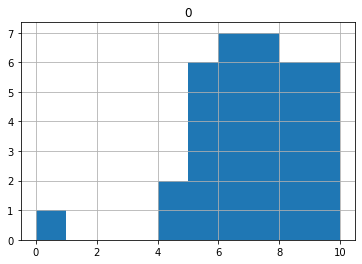

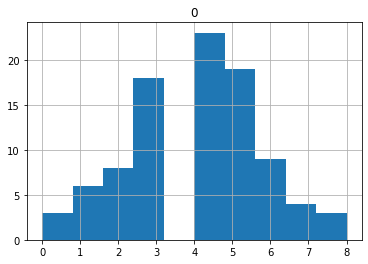

In [11]:
pd.DataFrame(data_1).hist(bins=10)
pd.DataFrame(data_2).hist(bins=10)

H0: данные принадлежат одному множеству     
H1: данные принадлежат разным множествам

In [12]:
alpha = 0.05
result = st.ttest_ind(data_1, data_2, equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, данные принадлежат разным множествам')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=7.068404675178226, pvalue=2.4974180382616264e-09)
Отвергаем нулевую гипотезу, данные принадлежат разным множествам


Даже при уровне значимости в 0.001%, мы можем отвергнуть нулевую гипотезу и утверждать, что данные не принадлежать одному множеству.

### 7. На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

Предположим, Вы сформировали две гипотезы: Нулевая гипотеза - распределение нормальное,  Альтернативная гипотеза - распределение не нормальное.

Допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости (p-value) = 0.03. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет? Вопрос без подвоха).

**Ответ:** все будет зависеть от того какой мы определим пороговый уровень статистической значимости. Если alpha 0.05, то мы сможем отвергнуть нулевую гипотезу о том, что распределение нормальное. Если, например, 0.01, то не сможем отвергнуть нулевую гипотезу.

### 8. Первая выборка — это пациенты, которых лечили препаратом А.  Вторая выборка — пациенты, которых лечили препаратом Б. Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

#### а) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (уровень значимости принять за 5% или 0.05)

#### b) При каком минимальном P-values различия были бы уже значимы? 

In [13]:
np.random.seed(11)
A = st.norm.rvs(scale=50,loc=10,size=300)
B = A + st.norm.rvs(scale=10,loc=-1.25,size=300)

#Ваш код:
# Подсказка, обратити внимание на Two-sample T-test

H0: значимых различий эффективности препаратов А и В нет
H1: существуют значимые различия в действии препаратов

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A3C3DF308>]],
      dtype=object)

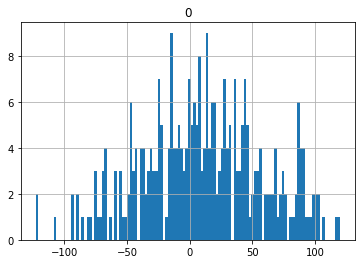

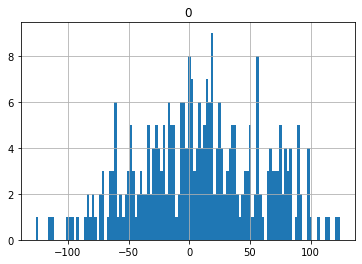

In [14]:
pd.DataFrame(A).hist(bins=120)
pd.DataFrame(B).hist(bins=120)

In [15]:
# Two-sample T-test
alpha= 0.05
result = st.ttest_rel(A,B)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, есть различия в эффективности действия препаратов')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_relResult(statistic=2.2958629051199755, pvalue=0.02237550043463252)
Отвергаем нулевую гипотезу, есть различия в эффективности действия препаратов


Если бы мы установили пороговый уровень статистической значимости равный 0,02, то тогда бы мы не смогли отвергнуть нулевую гипотезу